In [1]:
# !pip3 install aiomoex

In [1]:
import asyncio
import aiohttp
import aiomoex
import pandas as pd

from xlstm_moex.data.download import get_historical_data

In [45]:
async def download_data():
    async with aiohttp.ClientSession() as session:
        data = await aiomoex.get_board_history(
            session,
            'YNDX',
            columns=[
                'BOARDID', 'TRADEDATE', 'CLOSE', 'VOLUME', 'VALUE', 'OPEN', 'LOW', 'HIGH'
            ]
#             columns=None
        )
        df = pd.DataFrame(data)
#         df.set_index('TRADEDATE', inplace=True)
    return df

In [52]:
async def get_historical_data(date_start: str = '2020-09-01', date_end: str = '2020-09-04') -> pd.DataFrame:
    df = await download_data()
    return df[
        (df['TRADEDATE'] >= date_start) & (df['TRADEDATE'] <= date_end)
    ].reset_index(drop=True)

SyntaxError: 'await' outside async function (1351038063.py, line 2)

In [50]:
res = await get_historical_data(date_start = '2017-09-01')

In [51]:
res

,BOARDID,TRADEDATE,CLOSE,VOLUME,VALUE,OPEN,LOW,HIGH
0,TQBR,2017-09-01,1820.0,113715,2.052399e+08,1746.5,1740.0,1867.5
1,TQBR,2017-09-04,1833.0,20587,3.764057e+07,1817.0,1817.0,1837.5
2,TQBR,2017-09-05,1863.0,88227,1.645725e+08,1831.5,1821.0,1886.0
3,TQBR,2017-09-06,1843.0,50823,9.441299e+07,1861.5,1821.0,1885.0
4,TQBR,2017-09-07,1820.0,34801,6.347968e+07,1849.0,1798.0,1854.0
...,...,...,...,...,...,...,...,...
754,TQBR,2020-08-31,5089.4,22765694,1.163912e+11,4890.6,4881.0,5165.0
755,TQBR,2020-09-01,5033.0,3626441,1.842366e+10,5080.0,4984.8,5177.0
756,TQBR,2020-09-02,5070.0,2464483,1.240965e+10,5070.0,4943.0,5118.2
757,TQBR,2020-09-03,4917.8,2588571,1.290309e+10,5043.0,4870.0,5106.0


In [7]:
asyncio.run(get_historical_data(
    output_filename='yndx_20170901_20180901.csv',
    stock='YNDX',
    start_date='2017-09-01',
    end_date='2018-09-01'
))

RuntimeError: asyncio.run() cannot be called from a running event loop

In [3]:
await get_historical_data(
    output_filename='yndx_20170901_20180901.csv',
    stock='YNDX',
    start_date='2017-09-01',
    end_date='2018-09-01'
)

2024-09-29 15:03:24,903 - xlstm_moex.data.download - INFO - Finished downloading data, 254 rows and 23 columns
2024-09-29 15:03:24,906 - xlstm_moex.data.download - INFO - Saved to yndx_20170901_20180901.csv


In [4]:
df = pd.read_csv('yndx_20170901_20180901.csv')

In [5]:
df.head()

,BOARDID,TRADEDATE,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,...,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL,TRADINGSESSION,CURRENCYID,TRENDCLSPR
0,TQBR,2017-09-01,Yandex clA,YNDX,3232,205239892.5,1746.5,1740.0,1867.5,1820.0,...,1805.0,1805.0,1820.0,205239892.5,205239892.5,205239892.5,NaN,3,SUR,3.88
1,TQBR,2017-09-04,Yandex clA,YNDX,1296,37640573.0,1817.0,1817.0,1837.5,1833.0,...,1828.5,1828.5,1833.0,37640573.0,37640573.0,37640573.0,NaN,3,SUR,0.71
2,TQBR,2017-09-05,Yandex clA,YNDX,3008,164572539.0,1831.5,1821.0,1886.0,1868.5,...,1865.5,1865.5,1868.5,164572539.0,164572539.0,164572539.0,NaN,3,SUR,1.64
3,TQBR,2017-09-06,Yandex clA,YNDX,2978,94412985.5,1861.5,1821.0,1885.0,1843.0,...,1857.5,1857.5,1843.0,94412985.5,94412985.5,94412985.5,NaN,3,SUR,-1.07
4,TQBR,2017-09-07,Yandex clA,YNDX,1567,63479676.0,1849.0,1798.0,1854.0,1820.0,...,1824.0,1824.0,1820.0,63479676.0,63479676.0,63479676.0,NaN,3,SUR,-1.25


<Axes: xlabel='TRADEDATE'>

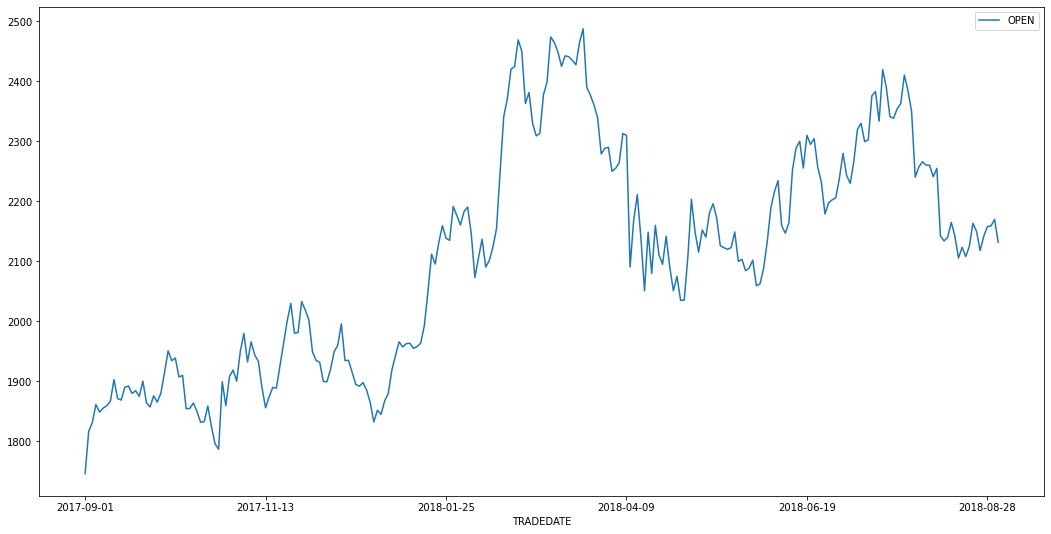

In [8]:
df.plot(x="TRADEDATE", y="OPEN", figsize=(18, 9))